# Многоклассовая_классификация_русскоязычных_текстов

## Интро

### Описание проекта

**Входные данные:** 

- Датасет для обучения на 2442 строки с текстами обращений клиентов на русском языке, размеченных по 11 категориям (закодированы от 0 до 11) + тестовые данные на 250 строк для проверки. 

**Задача:** 

- Обучить модель классификации клиентских обращений (предположительно для их сортировки по тематикам и пайплайнам дальнейшей обработки) - задача многоклассовой классификации, в качестве базовой метрики будем использовать accuracy, а также смотреть на classification_report и матрицу ошибок для корректировки модели под бизнес-задачу.

**Основные шаги:**

- Загрузка данных
- EDA
- Подготовка признаков (очистка и векторизация текста)
- Бейзлайн (быстрое базовое решение, чтобы было с чем сравнивать результаты более сложных алгоритмов)
- Моделирование (отбор предпочтительной предобработки данных, калибровка и выбор лучшей модели)
- Тестирование лучшей модели (предсказания на новых данных - отложенной изначально тестовой выборке)

**Что получилось реализовать:**

- Удалось хорошо поработать с предобработкой имеющихся текстов: исправить орфограию на русском, убрать не несущие полезной информации в рамках задачи эмоджи, обнаружить ключевые термины на английском и заменить на русский перевод, немного изменить словарь стоп-слов, чтобы чуть больше дифференцировать друг от друга похожие классы обращений, лемматизировать тексты для последующей векторизации, наглядно визуализировать разницу между классами для бизнеса
- Удалось обработать текст базовыми векторизаторами, причем более простой CountVectorizer на очищенном тексте показыват местами даже лучшие результаты, чем TF-IDF (такое может быть на небольших текстах + тут довольно узко специализированная тематика, выражаемая относительно небольшим словарем), правда более сложный TF-IDF, но без предобработки текста дает результат не сильно хуже - тут нужно смотреть, что с точки зрения бизнеса менее затратно
- Удалось обучить несколько моделей разного типа для сравнения эффективности от более простых алгоритмов к более сложным и визуализировать понятные бизнесу метрики для обсуждения оптимизации в рамках конкретных задач

**Что не получилось реализовать в рамках согласованных сроков:**

- Не удалось успеть реализовать fine tuning/дообучение какой-то базовой (base) версии трансформера Bert, предобученной на русских текстах просто для понимания, какой прирост она может дать по сравнению с гораздо менее ресурсоемкими решениями
- Не удалось успеть реализовать применение векторизации типа FastText также для сравнения эффективности
- Не удалось успеть поработать с дисбалансом классов (сгенерировать дополнительных текстов для слабо представленных классов), другой вопрос, а нужно ли бизнесу настраиваться на 10 класс "прочее" или сфокусироваться на более четком определении явных классов 

**Что еще можно сделать для улучшения результата:**

- Добавить новые признаки в обучение, например те же счетчики символов/слов, которые уже сгенерированы

- По имеющимся метрикам обсудить с бизнесом, какая стратегия определения классов целесообразнее и в соответствии с этим поиграться с пороговыми значениями, увеличивать precision или recall (если цель - это не упустить ни одного 0 класса, например, как наиболее срочных обращений, судя по всему, чтобы минимизировать репутационные потери бизнеса, то нужно повышать recall класса 0, а если цель оптимизировать ресурс доступных операторов и приоретизировать звонки, то, возможно, требуется увеличивать precision срочных тематик)

- Поработать с дисбалансом (если это требуется по бизнес задаче): самое простое видится в рамках TF-IDF сгенерировать тексты из би(три)грамм, которые встречаются в текстах слабо представленных классов, так как семантика в этой задаче не так критична, может сработать в теории, возможно еще с длиной текстов поиграться - я обратил внимание, что многие длинные тексты дают ключевую информацию уде в начале, а далее просто описывают подробно хронологию событий - выравнивание длины текстов в рамках TF-IDF может дать прирост качества

- Попробовать использовать предсказания более, чем одной модели

- Можно попробовать найти тематические тексты, связанные с интернетом, wi-fi и объединив их с нашими текстами на этом словаре обучить модель, чтобы она в перспективе лучше воспринимала новые тексты (в рамках этого увеличенного словаря, а не только наших 2000 строк)

### ТЗ от заказчика

**Задача:**

- Решить задачу классификации, использую данные "train.xlsx"
- Оценить качество решения 
- Сделать предсказание на данных "test.xlsx". Предсказание должно быть оформлено в виде файла с расширением ".csv", содержащем две колонки: 

- "id" – идентификатор строки в файле "test.xlsx",  
- "y" – предсказанное значения для сообщения с соответствующим идентификатором строки. 
- Именуем файл следующим образом "Фамилия_ИО.csv"

- Оформить работу в виде отчета в формате ".jpynb", отражающего ход решения. Весь код в отчете обязательно должен быть воспроизводимым. 
- Именуем файл с отчетом следующим образом "Фамилия_ИО.jpynb". 


**Уточнения:**
- Метрики для оценки качества выбираются самостоятельно
- К ответному письму необходимо приложить два вышеуказанных файла
- Помните, что важно не просто отправить финальный результат, но и отобразить все исследования, EDA, и другие моменты решения


### Импорты, окружение, опции, переменные:

In [1]:
#!pip install pandarallel
#!pip install fuzzywuzzy==0.18.0
#!pip install python-Levenshtein==0.12.0
#!pip install pyaspeller

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

from tqdm import tqdm
from tqdm import notebook
from pandarallel import pandarallel

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import re

import pyaspeller
from pyaspeller import YandexSpeller

import nltk
from nltk import word_tokenize
from nltk.corpus import wordnet, stopwords as nltk_stopwords
from nltk.probability import FreqDist

from wordcloud import WordCloud

import spacy

import emoji

from catboost import CatBoostClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, GridSearchCV

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, \
classification_report

import optuna

import warnings

In [2]:
#options
pd.options.display.max_colwidth = None

In [3]:
#warnings
warnings.filterwarnings('ignore')

In [4]:
fio = 'Pervov_SL'

In [5]:
RS=42
TS=.2

In [6]:
train_df = pd.read_excel('train.xlsx')
test_df = pd.read_excel('test.xlsx')

In [7]:
tqdm.pandas(desc='progress') 
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## EDA

### Базовый анализ

**Комментарий:** Загрузим данные, выведем случайные 5 строк датасетов: тренировочный фрейм на 2442 строки с текстами обращений клиентов на русском языке, размеченных по 11 категориям (закодированы от 0 до 11) и тестовый датасет на 250 строк с текстами без таргетов. Пропусков нет, названия столбцов и форматы данных адекватные, дубликатов нет. Есть дисбаланс в классах: 0 представлен больше всех (почти 18%), далее 7 классов распределены в диапазоне от 8 до почти 14%, а вот последние 3 класса представлены ощутимо хуже: 8 - чуть больше 3%, 9 - 1.5% и 10 - всего 1% (это только 26 строк). Что делать с дисбалансом, подумаем дальше по обстоятельствам.

In [9]:
train_df.sample(5)

,text,target
2304,Не работает интернет,0
457,"Здравствуйте. Не работает интернет, маршрутизатор перезагружали провод проверили.",0
1274,"Здравствуйте, какого лешого пинг скачет",6
1177,"Здравствуйте сломался роутер,можно ли поменять?",8
185,"Здравствуйте, постоянно пропадает интернет, то включается, то отключается",4


In [10]:
test_df.sample(5)

,id,text
237,237,"Добрый день, скажите пожалуйста, можно проверить наш интернет? Постоянный перебой сети идёт"
181,181,"Баланс положительный но не интернета не тв, мне такой провайдер не нужен"
37,37,Как поменять Пароль от вайфай?
78,78,пинг большой
205,205,Нужен выезд мастера. Делали ремонт перебили кабель


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2442 non-null   object
 1   target  2442 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.3+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      250 non-null    int64 
 1   text    250 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [13]:
train_df.describe(include = 'all')

,text,target
count,2442,2442.000000
unique,2442,NaN
top,"Здравствуйте, как поменять пароль на самом Wi-Fi",NaN
freq,1,NaN
mean,NaN,3.354627
std,NaN,2.598403
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,3.000000
75%,NaN,5.000000


In [14]:
class_balance = train_df.target.value_counts().reset_index()
class_balance['share, %'] = round(100*train_df.target.value_counts(normalize=True), 2)
class_balance

,target,count,"share, %"
0,0,432,17.69
1,1,341,13.96
2,4,318,11.10
3,2,271,10.85
4,3,265,13.02
5,6,235,9.38
6,5,229,9.62
7,7,210,8.60
8,8,78,3.19
9,9,37,1.52


In [15]:
print('Количествово дубликатов в трейне:', train_df[['text']].duplicated().sum())

Количествово дубликатов в трейне: 0


In [16]:
print('Количествово дубликатов в тесте:', test_df[['text']].duplicated().sum())

Количествово дубликатов в тесте: 0


### Счетчики

**Комментарий:** Добавим простейшие счетчики символов/слов, чтобы провести первичную оценку разброса размерности текстов, рассмотреть возможные выбросы в данных и сопоставить тренировочную и тестовую выборки. Обе выборки (трейн и тест) имеют скошенные распределения с резвим пиком стремящимся к нулевым значениям и длинными правыми хвостами (логично, что распределения количества символов и слов ведут себя примерно одинаково). Тренировочные данные стартуют от 1 слова и 6 символов соответственно с медианой в 9 слов (62 символа) и максимумальным значением 116 слов (784 символа). Согласно характеру распределения среднее значение смещено правее медианы. На "ящике с усами" видно, что где-то от 27 слов (примерно 180 символов) до порядка 55 слов (примерно 350 символов) потенциальные выбросы распределены еще очень плотно, а уже правее проявляются более разрозненными всплесками. Однако, аномалиями это назвать нет оснований - изучение текстов с максимальными значениями показало, что это просто обращения, в которых более подробно описывается проблема, к тому же тестовая выборка распределена похожим образом. Понятно, что деление на слова чисто условное (по пробелам), но так как текст еще не очищен, то там может встречаться разное и после очистки количество слов и символов может существенно сократиться, но характер распределений скорее всего не изменится и для составления первого впечатления это подойдет.

In [8]:
def charcount(text):
    """Возвращает кол-во символов в строке"""
    return len(text)

In [9]:
def wordcount(text):
    """Возвращает кол-во слов в строке"""
    return len(text.split())

In [10]:
def plot_num(data):
    """Строит гистограмму и "ящик с усами" распределений данных:
    
    На вход принимает датафрейм и строит графики по данным в столбцах из списка num_cols_list (см. ниже)
    """
    for col in num_cols_list:
        try:
            f, (ax_box, ax_hist) = plt.subplots(
                2,
                sharex=True,
                figsize=(14, 6),
                gridspec_kw={'height_ratios': (.15, .85)})

            sns.boxplot(x=data[col], ax=ax_box)
            sns.histplot(x=data[col], ax=ax_hist, bins=15, kde=True)

            ax_box.set(xlabel='')
            ax_box.set_title(f'Разброс значений {col} (box-plot)')
            ax_hist.set_title(f'Гистограмма {col}')
            ax_hist.set_xlabel(f'{col}')
            ax_hist.set_ylabel('Частота')

            plt.show()

        except:
            pass

In [11]:
num_cols_list = ['charcount', 'wordcount']

In [12]:
train_df['charcount'] = train_df['text'].apply(charcount)
train_df['wordcount'] = train_df['text'].apply(wordcount)

In [13]:
train_df['charcount'].describe()

count    2442.000000
mean       79.544226
std        63.544981
min         6.000000
25%        40.000000
50%        62.000000
75%        98.000000
max       784.000000
Name: charcount, dtype: float64

In [14]:
train_df['wordcount'].describe()

count    2442.000000
mean       11.758395
std         9.661486
min         1.000000
25%         6.000000
50%         9.000000
75%        14.000000
max       116.000000
Name: wordcount, dtype: float64

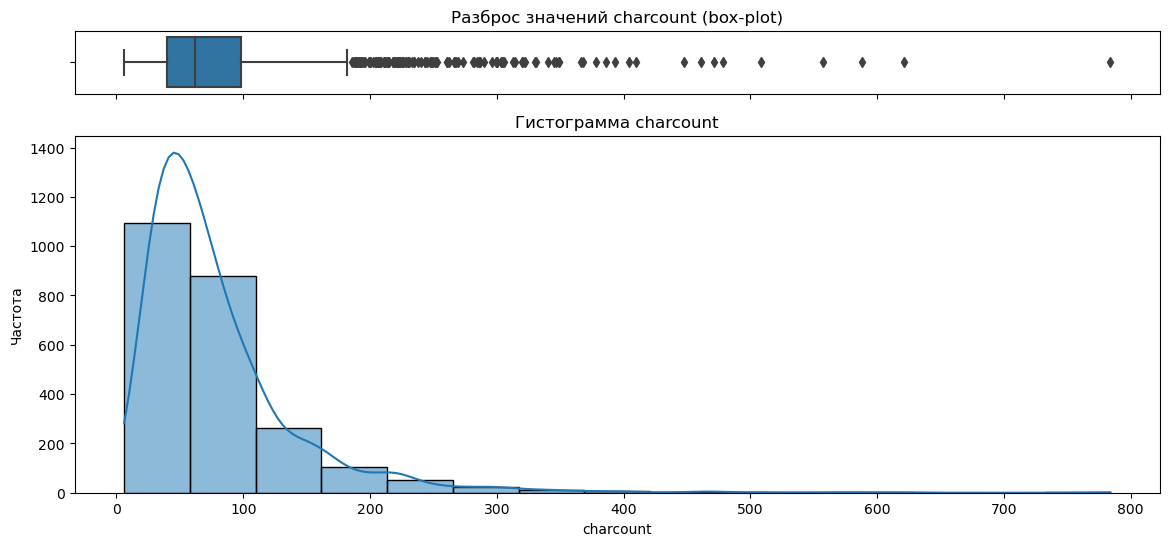

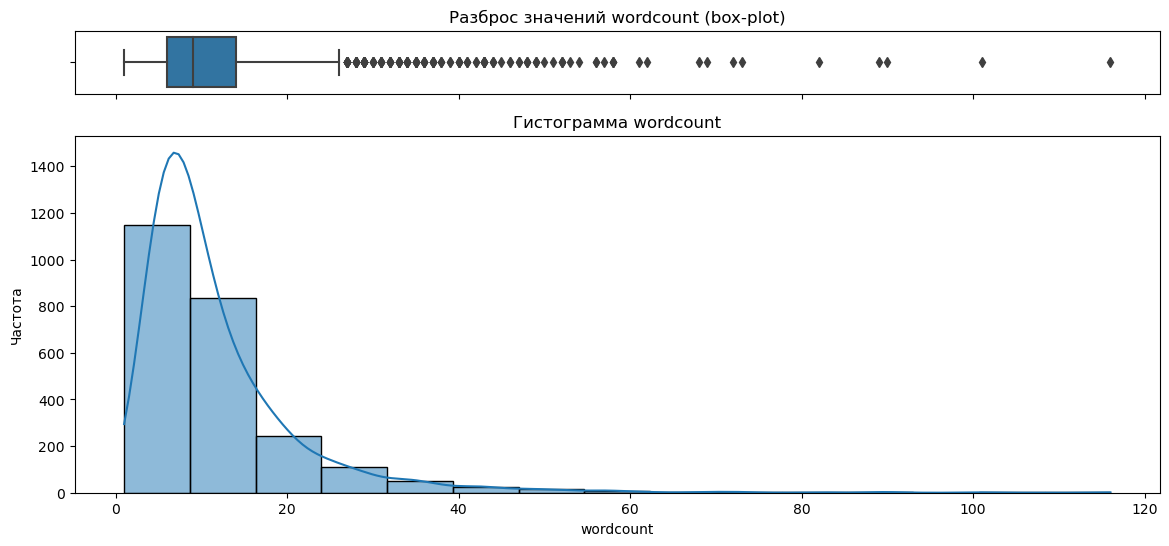

In [15]:
plot_num(train_df)

In [16]:
test_df['charcount'] = test_df['text'].apply(charcount)
test_df['wordcount'] = test_df['text'].apply(wordcount)

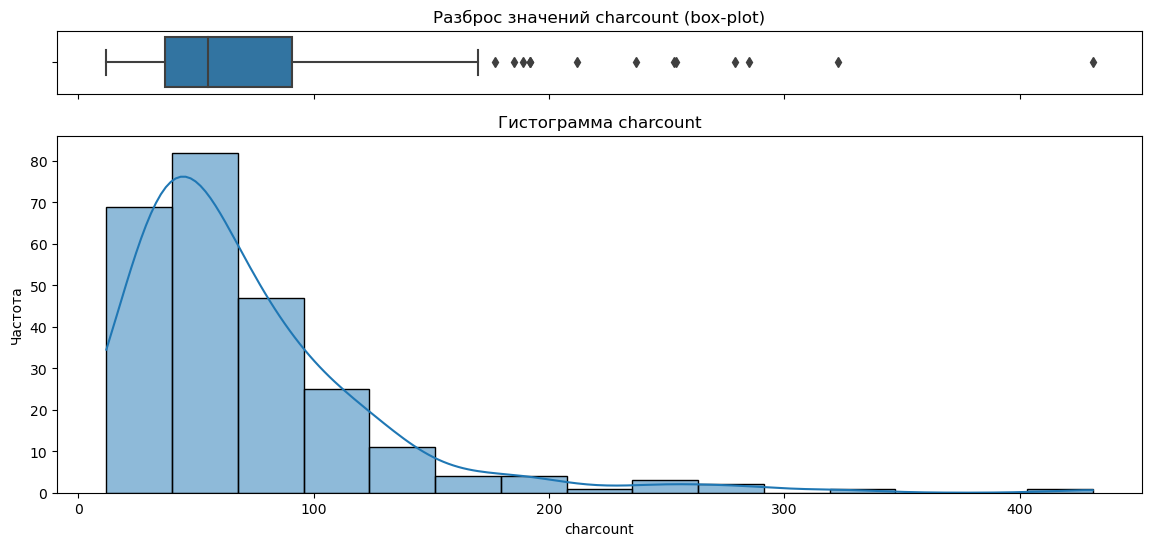

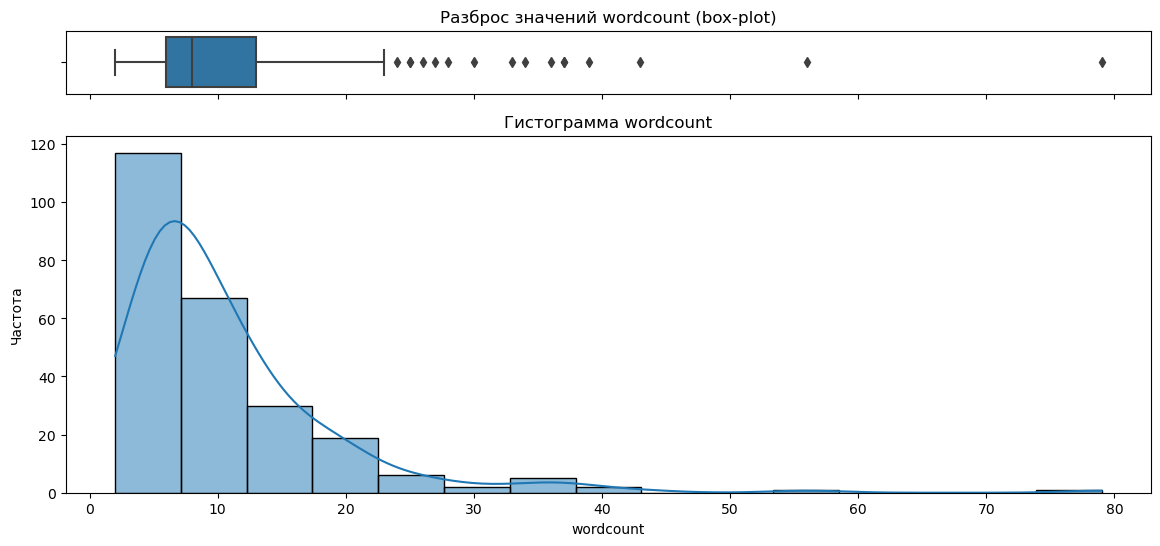

In [17]:
plot_num(test_df)

In [18]:
test_df['charcount'].describe()

count    250.000000
mean      71.588000
std       55.032979
min       12.000000
25%       37.000000
50%       55.000000
75%       91.000000
max      431.000000
Name: charcount, dtype: float64

In [19]:
test_df['wordcount'].describe()

count    250.000000
mean      10.708000
std        8.857571
min        2.000000
25%        6.000000
50%        8.000000
75%       13.000000
max       79.000000
Name: wordcount, dtype: float64

In [2]:
# Ячейка закомментирована, чтобы не выводить все тексты на экран там, где нельзя их свернуть
# смысл вывода в том, чтобы оценить тексты в потенциальных выбросах по длине на предмет аномалий
#train_df[train_df['charcount'] > 400]['text'].tolist()

In [3]:
# Ячейка закомментирована, чтобы не выводить все тексты на экран там, где нельзя их свернуть
# смысл вывода в том, чтобы оценить тексты в потенциальных выбросах по длине на предмет аномалий
#test_df[test_df['charcount'] > 400]['text'].tolist()

### Очистка текста

#### Функции и списки

In [24]:
def spell_check(text):
    """Возвращает текст с исправленной орфографией русского языка с помощью YandexSpeller()"""
    speller = YandexSpeller()
    changes = {change['word']: change['s'][0] for change in speller.spell(text)}
    for word, suggestion in changes.items():
        text = text.replace(word, suggestion)
    return text

In [25]:
def clean_text(text):
    """Возвращает текст с нижним регистром"""
    text = text.lower()
    text = ' '.join(re.sub(r'[^a-zа-яё]', ' ', text).split()) #a-z0-9
    return text 

In [56]:
def lemm_text(text):
    """Возвращает текст с замененными словами, оставляет тольо символы русского языка и приводит слова к леммам,
    также удаляя стоп-слова, определенные в словаре SpaCy
    слова под замену берет из списка to_replace_list, слова на замену из списка replacement_list
    """
    for to_replace, replacement in zip(to_replace_list, replacement_list):
        text = text.replace(to_replace, replacement)
    
    text = ' '.join(re.sub(r'[^а-яё]', ' ', text).split()) #a-z0-9
    
    lemm = nlp(text)
    lemm = ' '.join([token.lemma_ for token in lemm if not token.is_stop]) # if not token.is_stop
    text = ' '.join(lemm.split())
    return text

In [27]:
def eng_text(text):
    """Возвращает только англоязычные символы"""
    text = text.lower()
    eng_text = ' '.join(re.sub(r'[^a-z]', ' ', text).split())
    return eng_text

In [28]:
def find_close(col):
    """Возвращает слова из поданного текста, близкие по написанию к словам из списка keywords (см. ниже)
    на каждое слово по 10 кандидатов с указанием оценки близости (чем выше, тем ближе)
    Основано на библиотеке fuzzy_wuzzy для нечеткого поиска по расстоянию Левенштейна
    """
    unique_words = list(set(col.str.cat(sep=' ').split()))
    for word in keywords:
        print('----------------------------------------------')
        print(f'Слова, близкие к {word}:')
        print(process.extract(word, unique_words, limit=10))

In [29]:
keywords = [
    'wi-fi', 'poe', 'gpon', 'sfp', 'youtube', 'reset', 'speed test', 'eltex'
    'ethernet', 'tv', 'los', 'fortnite', 'apex legends', 'warface', 'wot',
    'world of tanks', 'faceit', 'red dead redemption', 'wow', 'call of duty',
    'okko', 'wink', 'ivi', 'windows', 'macos', 'centos', 'tp-link', 'd-link',
    'mbps', 'adsl', 'lan', 'ping', 'dns', 'latency', 'танк', 'варфейс',
    'колда', 'фортнайт', 'апекс', 'варкравт', 'коловдьюти', 'интернет',
    'роутер', 'вайфай', 'проблема', 'мб', 'скорость', 'тариф', 'пароль',
    'кабель', 'провод', 'мастер', 'специалист', 'соединение', 'восстановить',
    'забыть', 'пинг', 'игра', 'настройка', 'замена', 'заявка', 'оформлять',
    'вызов', 'винда', 'виндовс', 'макось', 'сентос', 'ютуб', 'винк', 'окко',
    'иви', 'смарттв', 'smarttv'
]

In [30]:
to_replace_list = [
    'ё', 'инет', 'wi fi', 'wifi', 'vifi', 'wife', 'wf', 'wi ti', 'wi wi', 'w wi', 
    'вайфайа', 'вйфай', 'вай фай', 'выйфай', 'вайфае', 'вайфая', 'вай фая',
    'poe', 'ppoe', 'pppoe', 'ethernet', 'ehernet', 'gpon', 'pon', 'sfp', 'youtube', 'ютюб',
    'ютубе', 'reset', 'speed test', 'speedtest', 'los', 'fortnite',
    'apex legends', 'warface', 'варфейс', 'wot', 'faceit', 'red dead redemption',
    'wow', 'call of duty', 'tanks', 'танк', 'zoom', 'okko',
    'wink', 'винк', 'ivi', 'windows', 'macos', 'centos', 'tp-link', 'tplink',
    'eltex', 'dlink', 'd-link', 'mbps', 'adsl', 'lan', 'ping', 'dns', 'latency'
]

In [31]:
replacement_list = [
    'е', 'интернет', 'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай',  
    'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай', 'вайфай',
    'ппое', 'ппое', 'ппое', 'эзернет', 'эзернет', 'гпон', 'пон', 'сфп', 'ютуб', 'ютуб',
    'ютуб', 'перезагрузка', 'тест скорость', 'тест скорость', 'индикатор', 'игра',
    'игра', 'игра', 'игра', 'игра', 'игра', 'игра', 'игра', 'игра', 'игра', 'игра', 'зум', 'тв',
    'тв', 'тв', 'тв', 'система', 'система', 'система', 'оборудование', 'оборудование',
    'оборудование', 'оборудование', 'оборудование', 'скорость', 'адсл', 'лан', 'пинг', 'днс', 'задержка'
]

#### Стоп-слова

In [32]:
nlp = spacy.load('ru_core_news_sm')

In [33]:
print(nlp.Defaults.stop_words)

{'эта', 'который', 'наперекор', 'прочими', 'ей', 'моем', 'с', 'коль', 'любого', 'многого', 'пор', 'этак', 'ая', 'прежде', 'причем', 'се', 'твоя', 'твоим', 'туда', 'некто', 'над', 'вновь', 'если', 'могу', 'ешь', 'потом', 'нём', 'наши', 'могите', 'ибо', 'подобным', 'навряд', 'ка', 'нечто', 'никем', 'иным', 'благодаря', 'настоящая', 'моя', 'сызнова', 'был', 'начале', 'незачем', 'как', 'зря', 'между', 'несколько', 'взаимно', 'поскольку', 'некоторая', 'до', 'нужная', 'сверх', 'ведь', 'насилу', 'такую', 'будут', 'поприще', 'непрерывно', 'прям', 'насчет', 'аж', 'чтоб', 'нему', 'от', 'ха', 'итак', 'нашем', 'настоящий', 'вперекор', 'любая', 'которого', 'такие', 'собственно', 'вопреки', 'чём', 'которых', 'которой', 'самому', 'алло', 'мне', 'емъ', 'после', 'позже', 'самый', 'настоящие', 'этим', 'во', 'ну', 'этого', 'чьих', 'неважно', 'ш', 'свои', 'пока', 'затем', 'подобно', 'другие', 'необходимым', 'неё', 'мою', 'наподобие', 'скоро', 'казался', 'оный', 'вначале', 'могут', 'своею', 'весь', 'них', 

In [34]:
nlp.Defaults.stop_words |= {
    'здравствуйте', 'здравствовать', 'добрый', 'доброго', 'день', 'дня',
    'вечер', 'вечера'
}

In [35]:
doc = nlp('здравствуйте здравствовать добрый доброго день дня вечер вечера')

for token in doc:
    print(token.text,token.is_stop)

здравствуйте True
здравствовать True
добрый True
доброго True
день True
дня True
вечер True
вечера True


In [36]:
nlp.Defaults.stop_words -= {
    'есть', 'не', 'нет', 'нету', 'ничего', 'опять', 'снова', 'что', 'где',
    'все', 'всё', 'еще', 'ещё'
}

In [37]:
doc = nlp('есть не нет нету ничего опять снова что где все всё еще ещё')

for token in doc:
    print(token.text,token.is_stop)

есть False
не False
нет False
нету False
ничего False
опять False
снова False
что False
где False
все False
всё False
еще False
ещё False


#### Орфография

**Комментарий:** В процессе изучения и лемматизации текстов пришел к выводу, что в нем много опечаток именно в русских словах и для более эффективной работы векторизаторов было бы неплохо сначала исправить орфографию в тексте. Ранее такую задачу не решал, попробовал пару других библиотек, которые вообще не справлялись и на их фоне YandexSpeller() как-будто решает свою задачу. Единственный момент: при запуске через .parallel_apply() функция через раз выдает ошибку (пытался это дело "дебажить", но возможно это связано с моей OS Catalina на Macbook, поэтому в финальной версии ноутбука оставляю просто .apply(), тем более есть вероятность, что скорости параллельное выполнение на CPU не добавляет (у всех по-разному, насколько я слышал).

In [38]:
train_df['spell_text'] = train_df['text'].apply(spell_check) #parallel_

In [1]:
# Ячейка закомментирована, чтобы не выводить все тексты на экран там, где нельзя их свернуть
#train_df['spell_text'].tolist()

#### Анализ англоязычных символов

**Комментарий:** В тексте довольно много английских символов - изучим их отдельно: большая часть связана с названиями стандартов в доменной области, производителей оборудования, онлайн игр, единиц измерения, а также небольшая часть связана с эмоджи. Так как задача проекта не связана с sentiment-анализом, а эмоджи не несут в себе информации по тематикам обращений, то проще всего будет их полностью удалить (на следующей итерации пробую это сделать с помощью специальной библиотеки). А вот что касается доменных спецтерминов на английском, то их будем переводить на русский через замену, предварительно изучив различные варианты написания с помощью нечеткого поиска (в процессе дальнейших итераций предобработки текста). 

In [40]:
train_df['eng_text'] = train_df['text'].parallel_apply(eng_text)

In [41]:
train_df['eng_text'].unique()

array(['wi fi', '', 'ivi zoom', 'quot quot', 'wifi',
       'img class emoji code draggable false src data image gif base r lgodlhaqabaiaaaaaaap yh baeaaaaalaaaaaabaaeaaaibraa data code',
       'gpon', 'static ip pppoe dhcp pptp l tp ip', 'wife',
       'wi fi youtube', 'reset', 'ping', 'wifi ghz',
       'speed test fortnite', 'speedtest', 'ip',
       'speedtest windows macos centos', 'wi fi keenetic ultra kn gpon',
       'gpon wifi b g n ac', 'g', 'tp link archer c',
       'pppoe dinamic static', 'pppoe', 'rt gm wifi', 'adsl', 'mbps',
       'speedtest c', 'status', 'wi fi amp', 'apex legends',
       'quot quot pppoe', 'warface', 'wf', 'word of tanks', 'lan', 'wot',
       'd link fc', 'mac', 'rt gm vlan pppoe', 'ppoe ppoe',
       'rt gpon cdc amp', 'faceit', 'quot link quot', 'wi fi wi fi wi fi',
       'wifi wifi', 'quot pppoe pppoa quot', 'ps share play',
       'quot wan quot', 'wi fi admin admin', 'pppoe tplink wr nd',
       'wifi direct', 'los', 'pon', 'ping ms ping', 'q

In [42]:
train_df[train_df['text'].str.contains('emoji')]

,text,target,charcount,wordcount,spell_text,eng_text
61,"Добрый день! У нас случилось ЧП дома<img class='emoji code1158' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='??'> Котёнок перегрыз оптоволоконный кабель...",3,224,16,"Добрый день! У нас случилось ЧП дома<img class='emoji code1158' draggable='false' src='data:image/gif;base64,R0lgodlhaqabaiabaaaaap///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='??'> Котёнок перегрыз оптоволоконный кабель...",img class emoji code draggable false src data image gif base r lgodlhaqabaiaaaaaaap yh baeaaaaalaaaaaabaaeaaaibraa data code
1204,"<img class='emoji code1239' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='🙋'>‍♀️у нас интернет очень медленно работает. Можете устранить проблему.",1,214,14,"<img class='emoji code1239' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='🙋'>‍♀️у нас интернет очень медленно работает. Можете устранить проблему.",img class emoji code draggable false src data image gif base r lgodlhaqabaiaaaaaaap yh baeaaaaalaaaaaabaaeaaaibraa data code
1845,"Здравствуйте почему интернет очень очень плохо<img class='emoji code0739' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='👎'> работает",4,200,12,"Здравствуйте почему интернет очень очень плохо<img class='emoji code0739' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='👎'> работает",img class emoji code draggable false src data image gif base r lgodlhaqabaiaaaaaaap yh baeaaaaalaaaaaabaaeaaaibraa data code
1999,"Здравствуйте<img class='emoji code0721' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='👋'> как сменить пароль от wi-fi ?",2,187,12,"Здравствуйте<img class='emoji code0721' draggable='false' src='data:image/gif;base64,R0lgodlhaqabaiabaaaaap///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='👋'> как сменить пароль от wi-fi ?",img class emoji code draggable false src data image gif base r lgodlhaqabaiaaaaaaap yh baeaaaaalaaaaaabaaeaaaibraa data code wi fi
2167,"Опять отключился интернет!!!<img class='emoji code1189' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='😤'>",0,173,8,"Опять отключился интернет!!!<img class='emoji code1189' draggable='false' src='data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7' data-code='😤'>",img class emoji code draggable false src data image gif base r lgodlhaqabaiaaaaaaap yh baeaaaaalaaaaaabaaeaaaibraa data code


In [43]:
train_df[train_df['text'].str.contains('wf')]

,text,target,charcount,wordcount,spell_text,eng_text
503,Потерял пороль от wf. Как восстановить?,5,39,6,Потерял пароль от wf. Как восстановить?,wf
1390,Как сменить пароль на wf,2,24,5,Как сменить пароль на wf,wf


#### Эмоджи

**Комментарий:** Пробуем удалить эмоджи с помощью библиотеки emoji. Выясняется, что в тексте, помимо кодировки самого эмоджи представлена еще дополнительная информация, которую библиотека не убирает. Если бы задача стояла убрать только текст, связанный с эмоджи, то можно было бы написать соответствующее регулярное выражение. А так как мы планируем работать с русскими символами, то после перевода информативных спец. терминов можно просто отфильтровать все нерусские символы с помощью тех же регулярок в составе пайплайна по очистке текста.

In [44]:
def remove_emoji(text):
    """Возвращает текст, очищенный от эмоджи"""
    text =  emoji.replace_emoji(text, replace='')
    return text

In [45]:
emo_test = train_df['text'][1204]

In [46]:
emo_test

"\u200d♀️у нас интернет очень медленно работает. Можете устранить проблему."

In [47]:
remove_emoji(emo_test)

"\u200dу нас интернет очень медленно работает. Можете устранить проблему."

#### Удаление лишних знаков

**Комментарий:** Оставляю данную функцию отдельной (не включая в качестве очередной итерации в общую очистку, которая пойдет далее), чтобы оставить промежуточный результат для работы других функций, например, нечеткого поиска (там смотрю варианты написания слов в том числе и на английском, чтобы потом добавить в список для замены, т.е. приведения к единообразному написанию).

In [48]:
train_df['clean_text'] = train_df['spell_text'].parallel_apply(clean_text)

In [4]:
# Ячейка закомментирована, чтобы не выводить все тексты на экран там, где нельзя их свернуть
# смысл вывода в том, чтобы визуально оценить работу функции
#train_df

#### Нечеткий поиск

**Комментарий:** Возможно, вопрос опечаток в словах на английском можно было решить, применив некий speller на английском, как я и проделал для русского языка, но уверенности, что он отработает корректно на вариациях написания 'wi fi', например, не было. К тому же, нечеткий поиск с fuzzy wuzzi я применил до понимания, что неплохо бы поправить орфографию хотя бы на русском, поэтому код оставил (заодно продемонстрировать его применение). Был еще замысел через функцию по списку ключевых слов отбирать близких соседей и этих соседей исправлять на слова из списка, но для разных слов порог похожести разнится и я не пришел к универсальному решению для всего словаря.

In [50]:
find_close(train_df['clean_text'])

----------------------------------------------
Слова, близкие к wi-fi:
[('fi', 90), ('w', 90), ('wi', 90), ('f', 90), ('wifi', 89), ('gif', 60), ('wf', 57), ('if', 57), ('ivi', 50), ('vi', 45)]
----------------------------------------------
Слова, близкие к poe:
[('pppoe', 90), ('e', 90), ('power', 75), ('pos', 67), ('pon', 67), ('iphone', 67), ('pppoa', 60), ('speedtest', 60), ('speed', 60), ('warzone', 60)]
----------------------------------------------
Слова, близкие к gpon:
[('gpon', 100), ('n', 90), ('g', 90), ('on', 90), ('pon', 86), ('iphone', 68), ('go', 67), ('pos', 57), ('ping', 50), ('tp', 45)]
----------------------------------------------
Слова, близкие к sfp:
[('sfp', 100), ('s', 90), ('f', 90), ('speedtest', 60), ('speed', 60), ('sbrf', 57), ('tp', 45), ('fc', 45), ('ps', 45), ('wf', 45)]
----------------------------------------------
Слова, близкие к youtube:
[('youtube', 100), ('b', 90), ('e', 90), ('wot', 60), ('tp', 45), ('duty', 45), ('fttb', 45), ('test', 45), ('ti

[('роутер', 100), ('роутере', 92), ('роутеру', 92), ('роутера', 92), ('о', 90), ('у', 90), ('т', 90), ('р', 90), ('е', 90), ('роутеров', 86)]
----------------------------------------------
Слова, близкие к вайфай:
[('вайфай', 100), ('фай', 90), ('в', 90), ('й', 90), ('вай', 90), ('а', 90), ('вайфая', 83), ('вайфаю', 83), ('вайфае', 83), ('вайфаем', 77)]
----------------------------------------------
Слова, близкие к проблема:
[('проблема', 100), ('проблем', 93), ('о', 90), ('м', 90), ('а', 90), ('ем', 90), ('р', 90), ('е', 90), ('про', 90), ('об', 90)]
----------------------------------------------
Слова, близкие к мб:
[('мб', 100), ('мбит', 90), ('м', 90), ('б', 90), ('моб', 80), ('моба', 67), ('мибид', 57), ('кб', 50), ('гб', 50), ('мс', 50)]
----------------------------------------------
Слова, близкие к скорость:
[('скорость', 100), ('скоростью', 94), ('о', 90), ('с', 90), ('к', 90), ('ко', 90), ('т', 90), ('р', 90), ('скорости', 88), ('скоростным', 78)]
---------------------------

#### Лемматизация

**Комментарий:** Добавляем русский перевод спец. терминам на англиском, оставляем только русскоязычные символы и получаем леммы слов с помощью библиотеки SpaCy: она удобная и быстрая, не требует передачи POS-тегов. Цифры не оставляем - они могли бы пригодиться, если бы была, например, задача вычленения сущностей из текста, например дат или телефонов, денежных сумм. Глядя на 4 колонки с текстами можно отслеживать, как они изменялись на разных стадиях обработки, заодно контролируем, как функция отработала английские слова и не появилось ли пустых строк - для этого применим те же счетчики, что использовали до очистки текста, заодно и оценим в числовом виде, как изменились данные.

In [51]:
train_df['lemm_text'] = train_df['clean_text'].parallel_apply(lemm_text)

In [5]:
# Ячейка закомментирована, чтобы не выводить все тексты на экран там, где нельзя их свернуть
# смысл вывода в том, чтобы визуально оценить работу функции
#train_df

In [6]:
# Ячейка закомментирована, чтобы не выводить все тексты на экран там, где нельзя их свернуть
# смысл вывода в том, чтобы визуально оценить тексты, содержащие англоязычные символы
#train_df[train_df['eng_text'] != ''].head(50)

In [54]:
train_df['lemm_char'] = train_df['lemm_text'].apply(charcount)
train_df['lemm_word'] = train_df['lemm_text'].apply(wordcount)

In [54]:
train_df['lemm_char'].describe()

count    2442.000000
mean       52.495086
std        44.407605
min         4.000000
25%        24.000000
50%        39.000000
75%        64.000000
max       560.000000
Name: lemm_char, dtype: float64

In [55]:
train_df['lemm_word'].describe()

count    2442.000000
mean        6.817772
std         5.565737
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        68.000000
Name: lemm_word, dtype: float64

In [56]:
train_df[train_df['lemm_word'] <= 1]

,text,target,charcount,wordcount,spell_text,eng_text,clean_text,lemm_text,lemm_char,lemm_word
12,почему такая скорость?,1,22,3,почему такая скорость?,,почему такая скорость,скорость,8,1
277,Почему тогда у меня пинг 200,6,28,6,Почему тогда у меня пинг 200,,почему тогда у меня пинг,пинг,4,1
401,У нас пинг 500,6,14,4,У нас пинг 500,,у нас пинг,пинг,4,1
419,Пингует,6,7,1,Пингует,,пингует,пингует,7,1
471,От интернета,10,12,2,От интернета,,от интернета,интернет,8,1
638,Пинг 100,6,8,2,Пинг 100,,пинг,пинг,4,1
744,Здравствуйте. Почему скорость такая???,1,38,4,Здравствуйте. Почему скорость такая???,,здравствуйте почему скорость такая,скорость,8,1
1186,Почему разрывы?,4,15,2,Почему разрывы?,,почему разрывы,разрыв,6,1
1210,Почему пинг 150,6,15,3,Почему пинг 150,,почему пинг,пинг,4,1
1489,Пинг 133,6,8,2,Пинг 133,,пинг,пинг,4,1


### Частотный анализ текста

**Комментарий:** Теперь, когда тексты очищены, самое время посмотреть, о чем же они, чтобы лучше понять принцип их деления на классы и возможные нюансы, связанные с этим. Нагляднее всего для бизнеса это можно отобразить через "облако слов". Картина по классам складывается примерно такая: 0 - нет интернета, ТВ, wi-fi, проблемы с роутером, мигающий индикатор, ошибка; 1 - низкая скорость интернета (или упала); 2 - смена пароля от wi-fi; 3 - проблема с кабелем/проводом, нужен вызов мастера; 4 - сильно похож на 0 по частотным словам "интернет", "вайфай", "проблема" (эта похожесть еще проявится далее при изучении матриц ошибок моделей), но добавляются акценты на обрыв/разрыв соединения постоянно, похоже речь не об отсутствии, а о перебоях в работе, 5 - восстановление пароля от "wi-fi"; 6 - высокий пинг для игр, проблема со скоростью; 7 - настройка роутера; 8 - замена роутера; 9 - тоже проблема связана с роутером но основной акцент именно на вызов мастера, оформление заявки; 10 - тут сложно, так как мало представлений (хотя 9 классу это не мешает четче определяться по частотности), при этом еще и явного акцента нет (в вот это уже сложнее) - как-будто понемногу из разных тематик - возникла гипотеза, что это класс "прочее", куда попадает все, что не определяется (возможно достаточно явно) под основные тематики, либо то, что не размечено по ним по какой-то причине. Написал по этому поводу вопрос представителю заказчика Мальцеву А.Н. и получил подтверждение, что 10 класс - это "прочее". Буду пробовать учесть это при моделировании.

In [57]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('russian'))  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergeypervov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
def plot_wordclouds(train_df, stopwords, num_classes=11):
    """Строит графики "облако слов" для каждого класса на одном изображении для удобства сравнения"""
    plt.figure(figsize=(15, 20))  # Размер всей фигуры

    for i in range(num_classes):
        # Генерация корпуса для текущего класса
        corpus = ' '.join(train_df[train_df['target'] == i]['lemm_text'])
         
        # Создаем облако слов
        wordcloud = WordCloud(stopwords=stopwords, collocations=False).generate(corpus)
        
        # Добавляем подграфик
        plt.subplot(np.ceil(num_classes / 2).astype('int'), 2, i + 1)  # (ряд, колонка, индекс)
        plt.imshow(wordcloud)
        plt.title(f'Облако слов для текстов класса {i}', fontsize=15)
        plt.axis('off')
    
    plt.tight_layout()  # Авторазметка для лучшего размещения
    plt.show();

In [59]:
def print_freq(train_df, num_classes=11):
    """Выводит топ-10 слов по частотности из каждого класса"""
    for i in range(num_classes):
        # Генерация корпуса для текущего класса
        corpus = ' '.join(train_df[train_df['target'] == i]['lemm_text'])
        fdist = FreqDist(nltk.Text(word_tokenize(corpus)))
        print('---------------------------------------')
        print(f'Частотность ТОП-10 слов из класса {i}:')
        print(fdist.most_common(10))

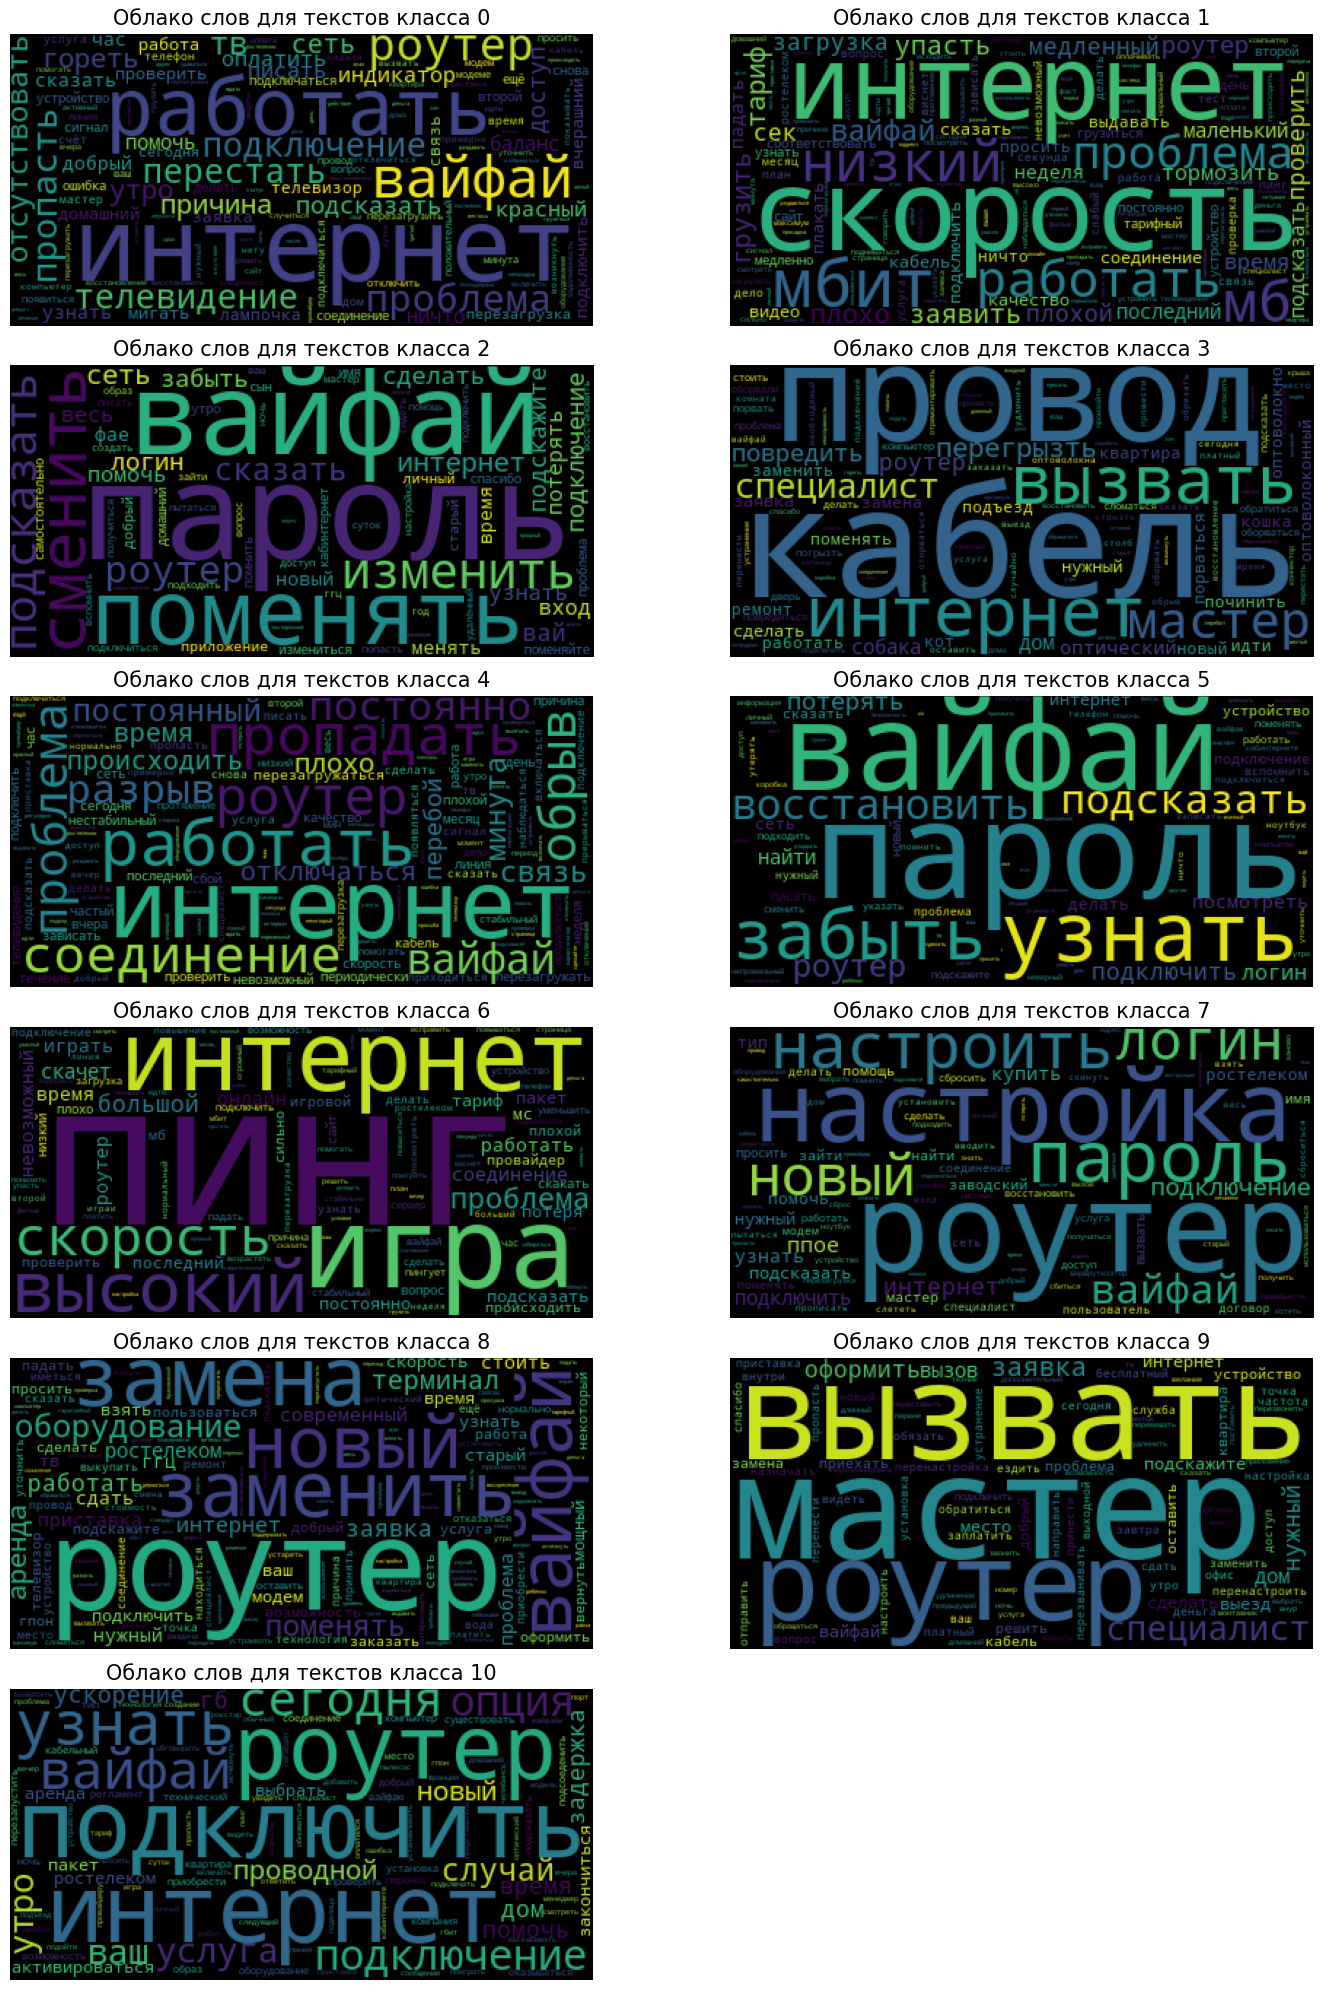

In [60]:
# Вызов функции
plot_wordclouds(train_df, stopwords)

In [61]:
# Вызов функции
print_freq(train_df)

---------------------------------------
Частотность ТОП-10 слов из класса 0:
[('интернет', 359), ('не', 247), ('работать', 199), ('нет', 105), ('вайфай', 86), ('роутер', 50), ('что', 49), ('проблема', 35), ('пропасть', 32), ('телевидение', 28)]
---------------------------------------
Частотность ТОП-10 слов из класса 1:
[('скорость', 276), ('интернет', 226), ('не', 105), ('мбит', 65), ('что', 57), ('мб', 49), ('низкий', 44), ('работать', 38), ('проблема', 32), ('вайфай', 30)]
---------------------------------------
Частотность ТОП-10 слов из класса 2:
[('пароль', 281), ('вайфай', 248), ('поменять', 139), ('сменить', 76), ('изменить', 34), ('подсказать', 30), ('не', 28), ('роутер', 18), ('сказать', 11), ('интернет', 9)]
---------------------------------------
Частотность ТОП-10 слов из класса 3:
[('кабель', 155), ('провод', 136), ('интернет', 69), ('вызвать', 62), ('мастер', 57), ('специалист', 40), ('перегрызть', 40), ('повредить', 40), ('роутер', 34), ('не', 28)]
---------------------

### Сохранение результатов очистки текста в .csv файл

In [7]:
#train_df

In [55]:
#train_df.to_csv('train_lemm_nostop.csv', index=False)

In [6]:
#train_df = pd.read_csv('train_lemm_wstop.csv')

In [8]:
#train_df

## Baseline

**Комментарий:** В качестве базового решения задачи - запустим пайплайн с векторизацией необработанного (изначального) текста с помощью TF-IDF (ему меньше помешают неудаленные стоп-слова и прочее лишнее, а заодно мы сможем оценить, какой прирост дает впоследствии наша предобработка текста, может оно и не стоит того с точки зрения прода). В качестве классификатора используем логистическую регрессию - модель хорошо интерпретируемая, простая и не требующая много ресурсов.

In [75]:
X_bl, y_bl = train_df[['text']], train_df['target']
print(f'X_bl.shape {X_bl.shape}')
print(f'y_bl.shape {y_bl.shape}')

X_bl.shape (2442, 1)
y_bl.shape (2442,)


In [76]:
preprocessor_bl = ColumnTransformer(
    [
        ('vectorizer', TfidfVectorizer(analyzer='char_wb', ngram_range = (1,3)), 'text')
    ],                         
    remainder = 'passthrough'
)

pipeline_bl = Pipeline(
    [
        ('preprocessor', preprocessor_bl),
        ('clf', LogisticRegression()), #max_iter = 1000
    ]
)
display(pipeline_bl)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vectorizer',
                                                  TfidfVectorizer(analyzer='char_wb',
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'text')])),
                ('clf', LogisticRegression())])

In [77]:
cross_valid_bl = cross_validate(pipeline_bl, 
                             X_bl, y_bl,
                             cv = 5, scoring = ['accuracy'], n_jobs = -1)

In [78]:
test_accuracy_bl = cross_valid_bl['test_accuracy'].mean()
print(f'Baseline test_accuracy: {test_accuracy_bl:.4f}')

Baseline test_accuracy: 0.8436


In [79]:
y_pred_bl = cross_val_predict(pipeline_bl, X_bl, y_bl, cv = 3)

In [80]:
# Посмотрим на различные метрики
print(classification_report(y_bl, y_pred_bl, zero_division = 0))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       432
           1       0.84      0.86      0.85       341
           2       0.94      0.92      0.93       271
           3       0.86      0.96      0.91       265
           4       0.78      0.77      0.78       318
           5       0.90      0.87      0.89       229
           6       0.96      0.88      0.92       235
           7       0.83      0.90      0.87       210
           8       0.94      0.38      0.55        78
           9       0.83      0.14      0.23        37
          10       0.00      0.00      0.00        26

    accuracy                           0.84      2442
   macro avg       0.78      0.69      0.70      2442
weighted avg       0.84      0.84      0.83      2442



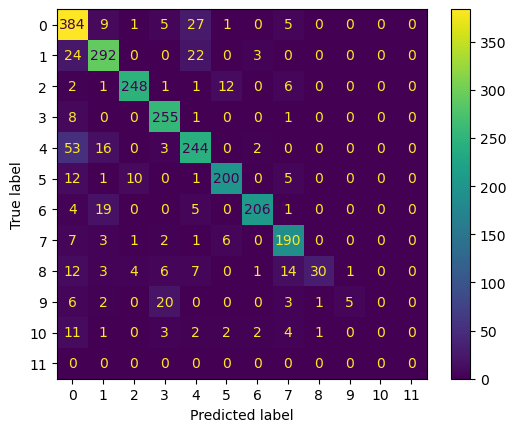

In [81]:
# confusion matrix plotting
cm_bl = confusion_matrix(y_bl, y_pred_bl, labels=np.arange(12).tolist())

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bl, display_labels=np.arange(12).tolist())
disp.plot()
plt.show();

In [82]:
score_list = list()
score_list.append(('LogisticRegression_TFIDF_baseline', 'accuracy', f'{test_accuracy_bl:.4f}'))
    
pd.DataFrame(score_list, columns=['model','metric','score'])

,model,metric,score
0,LogisticRegression_TFIDF_baseline,accuracy,0.8436


## Подбор моделей и калибровка

In [17]:
X, y = train_df[['lemm_text']], train_df['target']

In [18]:
print(f'X.shape {X.shape}')
print(f'y.shape {y.shape}')

X.shape (2442, 1)
y.shape (2442,)


### CountVectorizer + LogisticRegression

**Комментарий:** Теперь посмотрим, как справляется CountVectorizer с помощью очистки текста от стоп-слов и лемматизации, так как он быстрее TF-IDF и объем текста относительно небольшой есть шансы, что он проявит себя как минимум не сильно хуже.

In [85]:
# Создание Pipeline
preprocessor_bow = ColumnTransformer(
    [
        ('vectorizer', CountVectorizer(ngram_range=(1, 2)), 'lemm_text')
    ],                         
    remainder = 'passthrough'
)

pipeline_lrbow = Pipeline(
    [
        ('preprocessor', preprocessor_bow),
        ('classifier', LogisticRegression()),
    ]
)
display(pipeline_lrbow)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vectorizer',
                                                  CountVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'lemm_text')])),
                ('classifier', LogisticRegression())])

In [86]:
# Подбор гиперпараметров
param_grid_lrbow = {
    'classifier__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'classifier__multi_class': ['ovr', 'auto'],
    'classifier__C': [0.1, 0.3, 0.5, 0.7, 1.0],
    'classifier__class_weight': [None, 'balanced']
}

# Создание объекта GridSearchCV
grid_search_lrbow = GridSearchCV(pipeline_lrbow, param_grid_lrbow, cv=5, scoring='accuracy', n_jobs=-1)

In [87]:
grid_search_lrbow.fit(X, y)

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vectorizer',
                                                                         CountVectorizer(ngram_range=(1,
                                                                                                      2)),
                                                                         'lemm_text')])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__multi_class': ['ovr', 'auto'],
                         'classifier__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']},
             scoring='accuracy')

In [88]:
print(
    'Среднее значение accuracy логистической регрессии c лучшими параметрами на кросс-валидации: ', 
    f'{grid_search_lrbow.best_score_:.4f}'
)
print(
    f'Лучшие гиперпараметры линейной регрессии: {grid_search_lrbow.best_params_}'
)

Среднее значение accuracy логистической регрессии c лучшими параметрами на кросс-валидации:  0.8804
Лучшие гиперпараметры линейной регрессии: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__multi_class': 'ovr', 'classifier__solver': 'lbfgs'}


In [89]:
y_pred_lrbow = cross_val_predict(grid_search_lrbow.best_estimator_, X, y, cv = 3)

In [90]:
print(classification_report(y, y_pred_lrbow))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       432
           1       0.92      0.83      0.88       341
           2       0.95      0.92      0.93       271
           3       0.96      0.98      0.97       265
           4       0.83      0.81      0.82       318
           5       0.88      0.91      0.89       229
           6       0.96      0.97      0.97       235
           7       0.90      0.85      0.87       210
           8       0.79      0.81      0.80        78
           9       0.57      0.65      0.61        37
          10       0.15      0.12      0.13        26

    accuracy                           0.88      2442
   macro avg       0.79      0.79      0.79      2442
weighted avg       0.88      0.88      0.88      2442



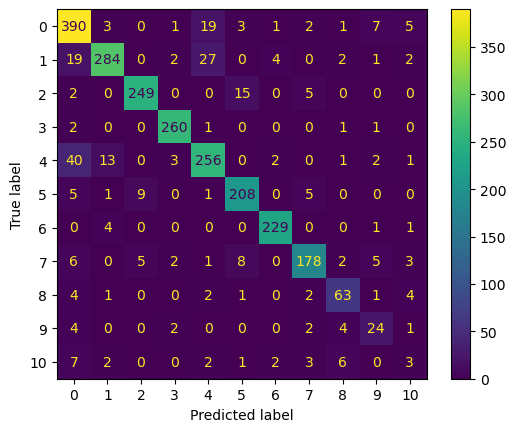

In [91]:
# Получение confusion matrix
cm_lrbow = confusion_matrix(y,
                            y_pred_lrbow,
                            labels=grid_search_lrbow.best_estimator_.classes_)

disp_lrbow = ConfusionMatrixDisplay(
    confusion_matrix=cm_lrbow,
    display_labels=grid_search_lrbow.best_estimator_.classes_)
disp_lrbow.plot()
plt.show();

In [92]:
score_list.append(('LogisticRegression+CountVectorizer_ngram(1,2)', 'accuracy',
                   f'{grid_search_lrbow.best_score_:.4f}'))
    
pd.DataFrame(score_list, columns=['model','metric','score'])

,model,metric,score
0,LogisticRegression_TFIDF_baseline,accuracy,0.8436
1,"LogisticRegression+CountVectorizer_ngram(1,2)",accuracy,0.8804


### TFIDFVectorizer + LogisticRegression

**Комментарий:** Посмотрим, как TF-IDF проявит себя на очищенном тексте.

In [93]:
# Создание Pipeline
preprocessor_idf = ColumnTransformer(
    [
        ('vectorizer', TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 3)), 'lemm_text')
    ],                         
    remainder = 'passthrough'
)

pipeline_lridf = Pipeline(
    [
        ('preprocessor', preprocessor_idf),
        ('classifier', LogisticRegression()),
    ]
)
display(pipeline_lridf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vectorizer',
                                                  TfidfVectorizer(analyzer='char_wb',
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'lemm_text')])),
                ('classifier', LogisticRegression())])

In [94]:
# Подбор гиперпараметров
param_grid_lridf = {
    'classifier__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'classifier__multi_class': ['ovr', 'auto'],
    'classifier__C': [0.1, 0.3, 0.5, 0.7, 1.0],
    'classifier__class_weight': [None, 'balanced']
}

# Создание объекта GridSearchCV
grid_search_lridf = GridSearchCV(pipeline_lridf, param_grid_lridf, cv=5, scoring='accuracy', n_jobs=-1)

In [95]:
grid_search_lridf.fit(X, y)

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sergeypervov/anaconda3/

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vectorizer',
                                                                         TfidfVectorizer(analyzer='char_wb',
                                                                                         ngram_range=(1,
                                                                                                      3)),
                                                                         'lemm_text')])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__multi_class': ['ovr', 'auto'],
                         'classifier__solver': ['lbfgs', 'newton-cg', 'sag',
                                                'saga']},
             scoring='accuracy')

In [96]:
print(
    'Среднее значение accuracy логистической регрессии c лучшими параметрами на кросс-валидации: ', 
    f'{grid_search_lridf.best_score_:.4f}'
)
print(
    f'Лучшие гиперпараметры линейной регрессии: {grid_search_lridf.best_params_}'
)

Среднее значение accuracy логистической регрессии c лучшими параметрами на кросс-валидации:  0.8788
Лучшие гиперпараметры линейной регрессии: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__multi_class': 'ovr', 'classifier__solver': 'lbfgs'}


In [97]:
y_pred_lridf = cross_val_predict(grid_search_lridf.best_estimator_, X, y, cv = 3)

In [98]:
print(classification_report(y, y_pred_lridf))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       432
           1       0.91      0.87      0.89       341
           2       0.96      0.92      0.94       271
           3       0.97      0.97      0.97       265
           4       0.79      0.83      0.81       318
           5       0.89      0.90      0.90       229
           6       0.96      0.91      0.94       235
           7       0.87      0.88      0.87       210
           8       0.77      0.85      0.80        78
           9       0.65      0.70      0.68        37
          10       0.11      0.08      0.09        26

    accuracy                           0.88      2442
   macro avg       0.79      0.80      0.79      2442
weighted avg       0.88      0.88      0.88      2442



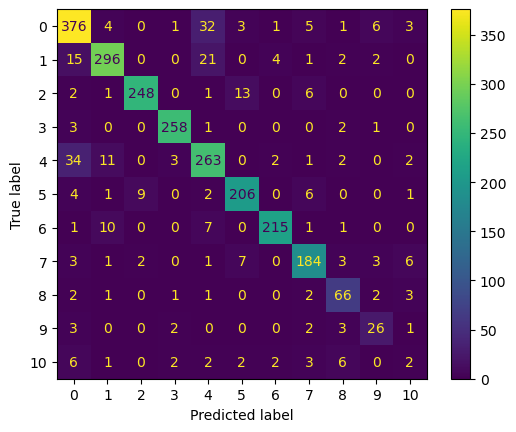

In [99]:
# Получение confusion matrix
cm_lridf = confusion_matrix(y,
                            y_pred_lridf,
                            labels=grid_search_lridf.best_estimator_.classes_)

disp_lridf = ConfusionMatrixDisplay(
    confusion_matrix=cm_lridf,
    display_labels=grid_search_lridf.best_estimator_.classes_)
disp_lridf.plot()
plt.show();

In [100]:
score_list.append(('LogisticRegression+TFidfVectorizer_ngram(1,3)', 'accuracy',
                   f'{grid_search_lridf.best_score_:.4f}'))
    
pd.DataFrame(score_list, columns=['model','metric','score'])

,model,metric,score
0,LogisticRegression_TFIDF_baseline,accuracy,0.8436
1,"LogisticRegression+CountVectorizer_ngram(1,2)",accuracy,0.8804
2,"LogisticRegression+TFidfVectorizer_ngram(1,3)",accuracy,0.8788


### SVM

**Комментарий:** Возможно у метода опорных векторов получится лучше нащупать границы классов.

In [19]:
# Создание Pipeline
preprocessor_idf = ColumnTransformer(
    [
        ('vectorizer', TfidfVectorizer(analyzer='char_wb', ngram_range=(1, 3)), 'lemm_text')
    ],                         
    remainder = 'passthrough'
)

pipeline_svcidf = Pipeline(
    [
        ('preprocessor', preprocessor_idf),
        ('classifier', SVC(random_state=RS, decision_function_shape='ovo')),
    ]
)
display(pipeline_svcidf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vectorizer',
                                                  TfidfVectorizer(analyzer='char_wb',
                                                                  ngram_range=(1,
                                                                               3)),
                                                  'lemm_text')])),
                ('classifier',
                 SVC(decision_function_shape='ovo', random_state=42))])

In [20]:
# Подбор гиперпараметров
param_grid_svcidf = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    #'classifier__decision_function_shape': ['ovo', 'ovr'],
    'classifier__C': [0.1, 0.3, 0.5, 0.7, 1.0],
    'classifier__class_weight': [None, 'balanced']
}

# Создание объекта GridSearchCV
grid_search_svcidf = GridSearchCV(pipeline_svcidf, param_grid_svcidf, cv=5, scoring='accuracy', n_jobs=-1)

In [21]:
grid_search_svcidf.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vectorizer',
                                                                         TfidfVectorizer(analyzer='char_wb',
                                                                                         ngram_range=(1,
                                                                                                      3)),
                                                                         'lemm_text')])),
                                       ('classifier',
                                        SVC(decision_function_shape='ovo',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring='accuracy')

In [22]:
print(
    'Среднее значение accuracy логистической регрессии c лучшими параметрами на кросс-валидации: ', 
    f'{grid_search_svcidf.best_score_:.4f}'
)
print(
    f'Лучшие гиперпараметры линейной регрессии: {grid_search_svcidf.best_params_}'
)

Среднее значение accuracy логистической регрессии c лучшими параметрами на кросс-валидации:  0.8870
Лучшие гиперпараметры линейной регрессии: {'classifier__C': 1.0, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf'}


In [23]:
y_pred_svcidf = cross_val_predict(grid_search_svcidf.best_estimator_, X, y, cv = 3)

In [24]:
print(classification_report(y, y_pred_svcidf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       432
           1       0.91      0.85      0.88       341
           2       0.96      0.92      0.94       271
           3       0.95      0.98      0.97       265
           4       0.77      0.85      0.81       318
           5       0.93      0.88      0.90       229
           6       0.96      0.93      0.95       235
           7       0.85      0.90      0.88       210
           8       0.85      0.85      0.85        78
           9       0.75      0.49      0.59        37
          10       0.00      0.00      0.00        26

    accuracy                           0.88      2442
   macro avg       0.80      0.78      0.78      2442
weighted avg       0.87      0.88      0.88      2442



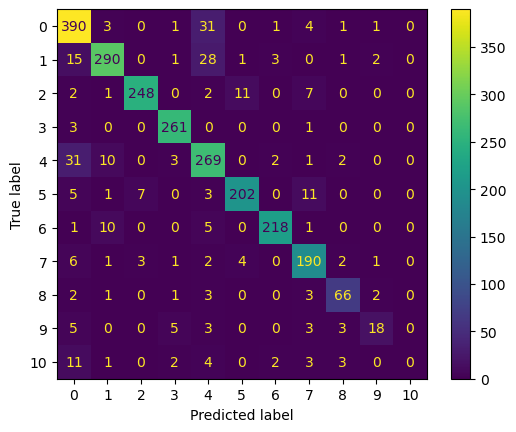

In [25]:
# Получение confusion matrix
cm_svcidf = confusion_matrix(y,
                            y_pred_svcidf,
                            labels=grid_search_svcidf.best_estimator_.classes_)

disp_svcidf = ConfusionMatrixDisplay(
    confusion_matrix=cm_svcidf,
    display_labels=grid_search_svcidf.best_estimator_.classes_)
disp_svcidf.plot()
plt.show();

In [120]:
score_list.append(('SVC+TFidfVectorizer_ngram(1,3)', 'accuracy',
                   f'{grid_search_svcidf.best_score_:.4f}'))
    
pd.DataFrame(score_list, columns=['model','metric','score'])

,model,metric,score
0,LogisticRegression_TFIDF_baseline,accuracy,0.8436
1,"LogisticRegression+CountVectorizer_ngram(1,2)",accuracy,0.8804
2,"LogisticRegression+TFidfVectorizer_ngram(1,3)",accuracy,0.8788
3,"SVC+TFidfVectorizer_ngram(1,3)",accuracy,0.8870


## Testing

**Комментарий:** Делаем предсказания на тестовой выборке (беру модель SVM, которая показала несколько более высокую accuracy, хотя были модели, которые при более низкой общей accuracy определяли даже 10й класс, так что в зависимости от целей бизнеса предпочтительная модель может меняться.

### Очистка

In [66]:
test_df['spell_text'] = test_df['text'].apply(spell_check) #parallel_

In [67]:
test_df['clean_text'] = test_df['spell_text'].apply(clean_text) #parallel_

In [68]:
test_df['lemm_text'] = test_df['clean_text'].apply(lemm_text) #parallel_

In [9]:
#test_df

In [70]:
#test_df.to_csv('test_lemm_wstop.csv', index=False)

In [8]:
#test_df = pd.read_csv('test_lemm_wstop.csv')

In [10]:
#test_df

In [14]:
test_df['lemm_char'] = test_df['lemm_text'].apply(charcount)
test_df['lemm_word'] = test_df['lemm_text'].apply(wordcount)

In [15]:
train_df[train_df['lemm_word'] <= 1]

,text,target,charcount,wordcount,spell_text,eng_text,clean_text,lemm_text,lemm_char,lemm_word
12,почему такая скорость?,1,22,3,почему такая скорость?,NaN,почему такая скорость,скорость,8,1
277,Почему тогда у меня пинг 200,6,28,6,Почему тогда у меня пинг 200,NaN,почему тогда у меня пинг,пинг,4,1
401,У нас пинг 500,6,14,4,У нас пинг 500,NaN,у нас пинг,пинг,4,1
419,Пингует,6,7,1,Пингует,NaN,пингует,пингует,7,1
471,От интернета,10,12,2,От интернета,NaN,от интернета,интернет,8,1
638,Пинг 100,6,8,2,Пинг 100,NaN,пинг,пинг,4,1
744,Здравствуйте. Почему скорость такая???,1,38,4,Здравствуйте. Почему скорость такая???,NaN,здравствуйте почему скорость такая,скорость,8,1
1186,Почему разрывы?,4,15,2,Почему разрывы?,NaN,почему разрывы,разрыв,6,1
1210,Почему пинг 150,6,15,3,Почему пинг 150,NaN,почему пинг,пинг,4,1
1489,Пинг 133,6,8,2,Пинг 133,NaN,пинг,пинг,4,1


### Подготовка признаков

In [32]:
X_test = test_df[['lemm_text']]

### Запись предсказания

In [33]:
predict_test = grid_search_svcidf.best_estimator_.predict(X_test)

In [34]:
result = test_df.loc[:]
result['y'] = predict_test

In [11]:
#result

In [35]:
result[['id', 'y']].to_csv(f'{fio}.csv', index=False)

In [36]:
test_submission = pd.read_csv(f'{fio}.csv')

In [37]:
test_submission

,id,y
0,0,5
1,1,1
2,2,6
3,3,6
4,4,3
...,...,...
245,245,0
246,246,0
247,247,4
248,248,3


# Заключение

Этот проект выполнялся в качестве тестового задания на стажировку DS NLP. В дополнение к классическим методам, примененным в работе я также попробовал несколько более сложных алгоритмов, например, с применением эмбеддингов (в частности Navec, обучение модели логистической регрессии на них не дало лучшего результата), обучением нейронных сетей (CNN, RNN (LSTM и GRU) с помощью библиотек TensorFlow и Keras - для обучения нейронок у нас маловато данных - всего 2000 строк и метрика выходит не сильно лучше), дообучением трансформера BERT, предобученного DeepPavlov с помощью библиотеки Torch (вот на БЕРТе метрика уже переваливает за 0.93, но стоит ли прирост привлечения ресурсоемкого решения - вопрос для обсуждения с бизнесом). Ссылка на облачный ноутбук с описанными решениями: https://colab.research.google.com/drive/1AN822LVb71K_LL3El8aTvgcydpgMcDRY?usp=sharing